<a href="https://colab.research.google.com/github/JungMinNoh/19-lab/blob/master/Do_it_7%EC%9E%A5_%EC%97%AC%EB%9F%AC%EA%B0%9C%EB%A5%BC_%EB%B6%84%EB%A5%98%ED%95%A9%EB%8B%88%EB%8B%A4_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6장에서는 양성,음성 클래스(2개의 클래스)가 있는 이진 분류(binary classfication)문제를 위한 완전 연결 신경망을 만들어보았습니다. 이번장에서는 여러개의 클래스가 있는 다중분류(multiclass classification)문제를 풀어보겠습니다. 이진 분류 알고리즘과 다중분류 알고리즘은 비슷한점이 많습니다. 다중분류의 개념을 익힌 다음에 이전 장과 마찬가지로 파이썬을 사용하여 직정 다중분류 알고리즘을 만들고 그런 다음 현재 가장 인기 있는 딥러닝 패키지인 구글의 텐서플로를 알아보고 이를 사용하여 완전 연결 신경망을 만들어 보겠습니다.

# 07-1 여러개의 이미지를 분류하는 다층 신경망을 만듭니다.

다중 분류 신경망을 만들기 위해서는 **소프트맥스** 함수와 **크로스엔트로피 손실함수** 라는 새로운 재료를 알아야 합니다. 두 함수는 다중 분류 신경망의 예측 훈련에서 중요한 역할을 합니다. 자동차 분류 문제를 통해 다중 분류를 위한 신경망과 이진 분류를 위한 신경망의 차이점이 무엇인지 알아보겠습니다. 

## 다중 분류 신경망을 알아봅니다

다음은 이진 분류에서 사용된 다층 신경망의 구조를 나타낸것입니다. 이진 분류를 위해 신경망의 출력층에는 뉴런을 하나만 두었습니다. 출력층의 활성화 값이 0.5보다 크면 양성 클래스, 그렇지 않으면 음성 클래스로 분류 했습니다.



![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-1.jpg?raw=true)

다중분류는 신경망을 어떻게 구성해야 할까요? 간단하게 마지막 '**출력층**'에 여러개의 뉴런을 놓는 방법을 생각 할 수 있습니다.

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-2.jpg?raw=true)

이진 분류와 다중 분류를 위한 신경망의 구조를 나타낸 그림을 비교 해 보니 출력층의 개수만 다르고 나머지는 같습니다. 이진 분류는 양성 클래스에 대한 확률 y^ 하나만 출력하고 다중 분류는 각 클래스에 대한 확률 값을 출력합니다. 
예를 들어 첫 번째 클래스에 대한 확률값은 y^1, 두번째 클래스에 대한 확률값은 y^2. 세번째 클래스에 대한 확률값은 y^3 으로 출력 됩니다. 이진 분류 신경망은 분류할 클래스가 2개 이므로 출력층에 뉴런을 하남나 배치합니다. 예를 들어 이진 분류 문제인 위스콘신 유방암 데이터 세트에서는 악성 종양만 구분하면 되므로 하나의 뉴런만 필요합니다.

## 다중 분류의 문제점과 소프트 맥스 함수를 알아봅니다

다음은 자동차,비행기,로켓이미지를 분류하는 다중 분류 신경망의 출력층만을 나타낸것입니다. 왼쪽 출력층의 활성화 값은 [0.9,0.8,0.7] 오른쪽 출력층의 활성화 값은 [0.5,0.2,0.1] 입니다. 이 값들은 앞에서 말했듯이 확률을 의미합니다. 예를 들어 왼쪽 출력층의 활성화 값 중 잗동차 그림에 있는 0.9라는 값은 이 이미지를 90%정도 확신으로 자동차를 예측한다고 해석할 수 있습니다.왼쪽과 오른쪽의 신경망은 모두 자동차를 타깃 클래스로 예측하고 있습니다. 하지만 왼쪽과 오른쪽의 활성화 값을 비교해 보면 미묘한 차이가 있음을 알 수 있습니다. 왼쪽 출력층의 활성화 값은 모두 높으면서 비슷하고 오른쪽 출력층의 활성화 값은 대체로 낮지만 자동차 클래스의 값(확률)이 비교적 높습니다.

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-3.jpg?raw=true)

### 활성화 출력의 합이 1이 아니면 비교하기 어렵습니다.

여기서 잠시 생각해 볼게 있습니다. 왼쪽에 있는 샘플에 대한 자동차 예측 확률(0.9)이 오른쪽에 있는 샘플에 대한 자동차 예측 확률(0.5)보다 높습니다. 하지만 오른쪽의 확률이 더 정확하고 잘 예측한것입니다. 이런 출력층의 활성화 값은 공정하게 비교하기 어렵습니다. 그래서 정규화가 필요 하게 됩니다.

### 소프트맥스 함수 적용해 출력 강도를 정규화 합니다.

출력층의 출력 강도를 정규화 하는 소프트 맥스 함수를 사용하면 위 문제를 쉽게 해결 할 수 있습니다. 여기서 출력강도를 정규화 한다는 의미는 전체 출력값의 합을 1로 만든 다는 의미 입니다. 이렇게 하면 값들을 확률로 생각 할 수 있습니다. 앞에서 본 다중 분류 신경망 출력층의 출력은 모두 3개였습니다. 출력이 3개인 다중분류 신경망에 대한 소프트 맥스 함수의 정의는 다음과 같습니다

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-5.jpg?raw=true)

위의 예제에 소프트 맥스 함수를 적용 하면 어떻게 될까요? 시그모이드 함수의 활성화 값이 [0.9,0.8,0.7] 로 출력된 예제에 소프트 맥스 함수를 적용해보겠습니다.

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-4.jpg?raw=true)

소프트 맥스 함수에는 출력층에서 계산된 선형 출력 (z1,z2,z3) 이 필요하므로 시그 모이드 함수 공식을 이용해서 이 값들을 구해 보겠습니다.   
시그모이드 함수 공식은

#$\frac{1}{1+e^{-z}}$

이므로 z에 대해서 정리하면

#$z=-ln(\frac{1}{\widehat{y}}-1)$

이 됩니다. 이 식을 이용하여 앞 그림의 z 값을 계산 하면 다음과 같습니다.

##$z_{1}=-ln(\frac{1}{0.9}-1)=2.20$ $z_{2}=-ln(\frac{1}{0.8}-1)=1.39$ $z_{3}=-ln(\frac{1}{0.7}-1)=0.85$

이 값을 소프트 맥스 함수에 대입하면 다음과 같은 정규화된 값을 얻을 수 있습니다.

##$\widehat{y_{1}}=\frac{e^{2.20}}{e^{2.20}+e^{1.39}+e^{0.85}}=0.59$ $\widehat{y_{2}}=\frac{e^{1.39}}{e^{2.20}+e^{1.39}+e^{0.85}}=0.26$$\widehat{y_{3}}=\frac{e^{0.85}}{e^{2.20}+e^{1.39}+e^{0.85}}=0.15$

소프트 맥스 함수를 적용하니 각 클래스의 확률은 자동차 59%, 비행기 26%, 로켓 15%가 되었습니다. 그리고 확률의 합도 1이 되었습니다. 출력층의 강도가 정규화 된것입니다. 두번째 샘플에도 소프트 맥스 함수를 적용해보겠습니다.

##$z_{1}=-ln(\frac{1}{0.5}-1)=0.0$ $z_{2}=-ln(\frac{1}{0.2}-1)=-1.39$ $z_{3}=-ln(\frac{1}{0.1}-1)=-2.20$

##$\widehat{y_{1}}=\frac{e^{0.0}}{e^{0.0}+e^{-1.39}+e^{-2.20}}=0.74$ $\widehat{y_{2}}=\frac{e^{-1.39}}{e^{0.0}+e^{-1.39}+e^{-2.20}}=0.18$$\widehat{y_{3}}=\frac{e^{-2.20}}{e^{0.0}+e^{-1.39}+e^{-2.20}}=0.08$


두번째 샘플의 경우 자동차일 확률이 74%라고 예측 되었습니다. 처음에는 직관에 의존하여 '오른쪽 샘플이 왼쪽샘플보다 자동차일 가능성이 더 높다'라고 예측 했지만 이제는 확실히 말 할수 있게 되었습니다. 소프트 맥스 함수를 이용하여 확률의 합을 1로 만드니 비교하기 좋아졌습니다.

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-6.jpg?raw=true)

다중 분류에서 출력층을 통과한 값들은 소프트 맥스 함수를 거치며 적절한 확률값으로 변합니다.

## 크로스 엔트로피 손실함수를 도입합니다.

이제 이 확률값을 이용하여 가중치와 절편을 업데이트 하기 위한 손실함수를 알아보겠습니다. 다중분류에는 로지스틱 손실함수의 '일반화 버젼'인 크로스 엔트로피 손실함수를 사용합니다. 

크로스 엔트로피 손실함수를 소개할때 '로지스틱 손실 함수를 일반화 했다'라고 한 이유는 로지스틱 손실함수가 크로스 엔트로피 손실함수의 이진 분류 버전이기 때문입니다. 두 함수를 비교해 보겠습니다.

## 크로스 엔트로피 손실함수

##$L=-\sum_{c=1}^{c}y_{c}log(a_{c})=-(y_{1}log(a_{1})+y_{2}log(a_{2})\cdots+y_{c}log(a_{c}))=-1\times log(y_{a=1})$

## 로지스틱 손실 함수

## $L = -(ylog(a)+(1-y)log(1-a))$

크로스 엔트로피 손실 함수의 시그마 기호위의 값 (c) 은 전체 클래스 개수를 의미합니다. 앞에 예제에 적용하면 자동차,비행기,로켓으로 구분한 클래스 개수이므로 3이 됩니다. 분류 문제에서 정답 클래스의 타깃은 1이고 나머지 클래스의 타깃은 0입니다. 앞에서 본 예제중 하나에 적용 하면 -(1x0.74 + 0x0.18 + 0x0.08)입니다. 결국 정답 클래스를 제외한 나머지 클래스 (y=0)에 대한 손실항은 모두 제거 되어

##$L=-log(a_{y=1})$

이 됩니다. a는 정답 클래스에 해당하는 뉴런의 활성화 출력을 말합니다.

##로지스틱 손실함수와 크로스 엔트로피 손실 함수는 매우 비슷합니다.

크로스 엔트로피 손실 함수와 로지스틱 손실 함수의 차이를 알아보기 위해 로지스틱 손실 함수를 타깃으로 양성 클래스 (y=1)인 경우와 음성 클래스(y=0)인 경우로 나눠 식을 정리해보겠습니다. 로지스틱 손실 함수는 양성클래스 일때 두번째 항이 소거 되고 음성 클래스 일때는 첫번째항이 소거 됩니다.

###$y = -log a$   양성 클래스인경우 y=1 
###$y = -log(1-a)$ 음성 클래스인경우 y=0

($1-a$)를 음성 클래스의 활성화 출력이라 생각 하면 크로스 엔트로피 손실 함수를 정리한 식과 같다고 볼 수 있습니다.

# 크로스 엔트로피 손실 함수를 미분합니다.

경사 하강법을 사용하기 위해 크로스 엔트로피 손실 함수를 미분해 보겠습니다.

자동차,비행기,로켓을 분류하는 3개의 클래스를 가진 다중분류의 예를 들어 크로스 엔트로피 손실 함수의 미분 과정을 알아 보겠습니다

###z1에 대해 미분합니다.

먼저 z1에 대한 크로스 엔트로피 손실함수의 미분을 연쇄 법칙을 적용하여 나타냅니다. 연쇄법칙을 적용할때 한가지 주의할것이 있습니다. 시그모이드 함수와는 달리 소프트맥스 함수의 출력 a1,a2,a3 가 모두 z1의 함수이고 손실함수L이 a1,a2,a3의 함수 이므로 연쇄법칙은 다음과 같이 나타낼 수 있습니다.

#$\frac{\partial L}{\partial z_{1}}=\frac{\partial L}{\partial a_{1}}\frac{\partial a_{1}}{\partial z_{1}} + \frac{\partial L}{\partial a_{2}}\frac{\partial a_{2}}{\partial z_{1}} + \frac{\partial L}{\partial a_{3}}\frac{\partial a_{3}}{\partial z_{1}}$

![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-7.jpg?raw=true)

먼저 $\frac{\partial L}{\partial a_{1}}$을 구하겠습니다.

크로스 엔트로피 손실 함수는
## $\frac{\partial L}{\partial a_{1}}=-\frac{\partial }{\partial a_{1}}(y_{1}log(a_{1})+y_{2}log(a_{2})+y_{3}log(a_{3}))=-\frac{y_{1}}{a_{1}}$

$y_{2}log(a_{2})+y_{3}log(a_{3})$ 는 $a_{1}$의 함수가 아니므로 소거 되고 $y_{1}log(a_{1})$만 남습니다.

$log(a)$의 도함수는$\frac{1}{a}$이므로 $-\frac{y_{1}}{a_{1}}$이 됩니다.

마찬가지 방법으로 $a_{2}$,$a_{3}$에 대해 미분하면 다음과 같은 결과를 얻을 수 있습니다.

#$\frac{\partial L}{\partial a_{2}}= -\frac{y_{2}}{a_{2}}$

#$\frac{\partial L}{\partial a_{3}}= -\frac{y_{3}}{a_{3}}$

이 식을 $\frac{\partial L}{\partial z_{1}}$ 에 대입하면 다음과 같습니다.

#$\frac{\partial L}{\partial z_{1}}=\frac{\partial L}{\partial a_{1}}\frac{\partial a_{1}}{\partial z_{1}} + \frac{\partial L}{\partial a_{2}}\frac{\partial a_{2}}{\partial z_{1}} + \frac{\partial L}{\partial a_{3}}\frac{\partial a_{3}}{\partial z_{1}}$ = ($-\frac{y_{1}}{a_{1}})\frac{\partial a_{1}}{\partial z_{1}} + (-\frac{y_{2}}{a_{2}})\frac{\partial a_{2}}{\partial z_{1}} + (-\frac{y_{3}}{a_{3}})\frac{\partial a_{3}}{\partial z_{1}}$ 

이제 $\frac{\partial a_{1}}{\partial z_{1}}$ 에 대해 유도 해보겠습니다. 먼저 $ a_{1}$ 은 소프트 맥스 함수의 출력값이므로 이에 대한 식을 풀어서 써야 합니다.

#$\frac{\partial a_{1}}{\partial z_{1}}= \frac{\partial }{\partial z_{1}}(\frac{e^{z_{1}}}{e^{z_{1}}+e^{z_{2}}+e^{z_{3}}})$

계산과정 생략 (수식 너무 많음)

결론은

#$\frac{\partial a_{1}}{\partial z_{1}}=a_{1}(1-a_{1})$

#$\frac{\partial a_{2}}{\partial z_{1}}=-a_{2}a_{1}$

#$\frac{\partial a_{3}}{\partial z_{1}}=-a_{3}a_{1}$

이 값들을 $\frac{\partial L}{\partial z_{1}}$ 에 적용하면

#$\frac{\partial L}{\partial z_{1}}=\frac{\partial L}{\partial a_{1}}\frac{\partial a_{1}}{\partial z_{1}} + \frac{\partial L}{\partial a_{2}}\frac{\partial a_{2}}{\partial z_{1}} + \frac{\partial L}{\partial a_{3}}\frac{\partial a_{3}}{\partial z_{1}}$

#$= (-\frac{y_{1}}{a_{1}})\frac{\partial a_{1}}{\partial z_{1}} + (-\frac{y_{2}}{a_{2}})\frac{\partial a_{2}}{\partial z_{1}} + (-\frac{y_{3}}{a_{3}})\frac{\partial a_{3}}{\partial z_{1}}$ 

#$= (-\frac{y_{1}}{a_{1}})a_{1}(1-a_{1}) + (-\frac{y_{2}}{a_{2}})(-a_{2}a_{1}) + (-\frac{y_{3}}{a_{3}})(-a_{3}a_{1})$ 

#$= -y_{1}(1-a_{1})+y_{2}a_{1}+y_{3}a_{1} $ 

#$= -y_{1}+(y_{1}+y_{2}+y_{3})a_{1} $ 

#$= -(y_{1}-a_{1}) $ 

#$\frac{\partial L}{\partial z_{1}} = -(y_{1}-a_{1}) $ 

벡터 **$z$** 에 대해 정리 하면 크로스 엔트로피 손실함수의 미분 결과는 다음과 같습니다.

#$\frac{\partial L}{\partial z_{}} = -(y_{}-a_{}) $ 

### 따라서 크로스 엔트로피 손실함수를 역전파에 사용하기 위해 코드를 따로 구현할 필요가 없습니다. 즉 4장에서 구현한 backward() 메서드를 그대로 사용할수 있습니다.

# **다중분류 신경망을 구현합니다.** 

In [0]:
import numpy as np

In [0]:
class MultiClassNetwork:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.sigmoid(z1)               # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def softmax(self, z):
        # 소프트맥스 함수
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, n_classes))   # (은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            print('.', end='')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.softmax(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return np.argmax(z, axis=1)  # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.softmax(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

# 의류 이미지를 분류 합니다.

앞에서 만든 Multiclassnetwork 클래스를 사용하여 '의류 이미지 분류하기'라는 다중 분류 문제를 해결 해 보겠습니다. 이번 실습 부터는 패션 MNIST 데이터를 텐서플로에서 불러와 사용합니다.

1.텐서플로 설치 및 임포트 하기

In [3]:
!pip install tensorflow-gpu==2.0.0-rc1

In [0]:
import tensorflow as tf

2.텐서플로 버전 확인하기

In [9]:
tf.__version__

'2.0.0-rc1'

3.패션 MNIST데이터 세트 불러오기

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4.훈련 세트의 크기 확인하기

In [11]:
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


5.imgshow()함수로 샘플 이미지 확인하기

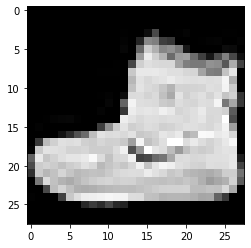

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0], cmap='gray')
plt.show()

6.타깃의 내용과 의미 확인하기

In [13]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [0]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', 
               '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

In [15]:
print(class_names[y_train_all[0]])

앵클부츠


7.타깃 분포 확인하기

In [16]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

8.훈련 세트와 검증 세트 고르게 나누기

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [20]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [21]:
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

9.입력 데이터 정규화 하기

In [0]:
x_train = x_train / 255
x_val = x_val / 255

10.훈련세트와 검증세트의 차원 변경하기

In [0]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [25]:
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-8.jpg?raw=true)

# 타깃 데이터를 준비하고 다중 분류 신경망을 훈련합니다